# House Price Prediction Model Documentation

This Jupyter notebook contains a TensorFlow-based deep learning model for predicting house prices based on images of different rooms in a house. The model is designed to take four inputs: bathroom, bedroom, frontal, and kitchen images. Each image is preprocessed and then fed into a separate convolutional neural network (CNN) for feature extraction. The extracted features are then concatenated and passed through a fully connected layer to make the final prediction.

## Table of Contents

1. [Environment Setup](#environment-setup)
2. [Model Architecture](#model-architecture)
3. [Data Preprocessing](#data-preprocessing)
4. [Custom Loss Function](#custom-loss-function)
5. [Model Training](#model-training)
6. [Model Evaluation](#model-evaluation)

## Environment Setup

The code begins by setting the TensorFlow logging level to suppress unnecessary messages. It then imports the necessary libraries and modules.

```python
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
from tensorflow.keras import layers, models
```

## Model Architecture

The `HouseNet` class contains a static method `build()` that constructs the deep learning model. The model takes four inputs: `bathroom_input`, `bedroom_input`, `frontal_input`, and `kitchen_input`. Each input is processed through a CNN with two convolutional layers followed by max pooling. The outputs of the CNNs are then concatenated along the channel axis. The concatenated features are flattened and passed through two fully connected layers to make the final prediction.

```python
class HouseNet():

    @staticmethod
    def build():
        # ... (code for building the model)
```

## Data Preprocessing

The code reads the house information from a CSV file and normalizes the labels. It then preprocesses the images by resizing them to 32x32 pixels, converting them to RGB format, and normalizing the pixel values. The images are stored in separate lists based on their location in the house.

```python
df = pd.read_csv("HousesInfo.txt", sep = " ", names=["col_1", "col_2", "col_3", "col_4", "price"])
labels = np.array(df.loc[:, "price"])
labels = labels/np.max(labels)

def preprocess(img):
    # ... (code for preprocessing the images)
```

The images are split into training and testing sets using the `train_test_split` function from the scikit-learn library.

## Custom Loss Function

The code defines a custom loss function called `opp_log_cosh` that calculates the loss between the predicted and true house prices. The loss is calculated as the sum of the hyperbolic cosine of the difference between the predicted and true prices.

```python
from tensorflow.keras.losses import Loss
class opp_log_cosh(Loss):
    def __init__(self):
        super().__init__()

    def call(self, y_true, y_pred):
        error = tf.cosh(y_pred - y_true)
        error = tf.math.log(error)
        cal_lost = tf.reduce_sum(error)
        return cal_lost
```

## Model Training

The model is trained using the `fit` method of the Keras model. The training data consists of the preprocessed images and the corresponding labels. The model is trained for 40 epochs, and the training and validation loss are recorded.

```python
net = HouseNet.build()
net.compile(optimizer="adam", loss=opp_log_cosh())

H = net.fit(x=[bathroom_train, bedroom_train, frontal_train, kitchen_train],
            y=[labels_train],
            validation_data=([bathroom_test, bedroom_test, frontal_test, kitchen_test], labels_test),
            epochs=40,
            verbose=1)
```

## Model Evaluation

The training and validation loss curves are plotted to visualize the model's performance.

```python
plt.plot(H.history["loss"], label="train loss")
plt.plot(H.history["val_loss"], label="test loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy/loss")
plt.title("price predictions")
plt.show()
```

This documentation provides an overview of the code and its components. For more detailed explanations and code comments, please refer to the original code.

In [1]:

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
from tensorflow.keras import layers, models

class HouseNet():
    
    @staticmethod
    def build():
        bathroom_input = layers.Input((32, 32, 3))

        x = layers.Conv2D(16, (3, 3), padding="same",activation="relu")(bathroom_input)
        x = layers.MaxPool2D((2, 2))(x)
        x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(x)
        x = layers.MaxPool2D((2, 2))(x)

        bedroom_input = layers.Input((32, 32, 3))
        y = layers.Conv2D(16, (3, 3), padding="same",
                          activation="relu")(bedroom_input)
        y = layers.MaxPool2D((2, 2))(y)
        y = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(y)
        y = layers.MaxPool2D((2, 2))(y)

        frontal_input = layers.Input((32, 32, 3))
        z = layers.Conv2D(16, (3, 3), padding="same",
                          activation="relu")(frontal_input)
        z = layers.MaxPool2D((2, 2))(z)
        z = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(z)
        z = layers.MaxPool2D((2, 2))(z)

        kitchen_input = layers.Input((32, 32, 3))
        w = layers.Conv2D(16, (3, 3), padding="same",
                          activation="relu")(kitchen_input)
        w = layers.MaxPool2D((2, 2))(w)
        w = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(w)
        w = layers.MaxPool2D((2, 2))(w)
        

        concat_inputs = layers.concatenate([x, y, z, w], axis = 2)
        flat_layer = layers.Flatten()(concat_inputs)
        out = layers.Dense(100, activation="relu")(flat_layer)
        out = layers.Dense(1, activation="linear")(out)

        net = models.Model(
            inputs=[bathroom_input, bedroom_input, frontal_input, kitchen_input], outputs=out)

        return net


In [2]:
import cv2
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

bathroom_list = []
bedroom_list = []
frontal_list = []
kitchen_list = []
label_list = []

df = pd.read_csv("HousesInfo.txt", sep = " ",
                    names=["col_1", "col_2", "col_3", "col_4", "price"])

labels = np.array(df.loc[:, "price"])

labels = labels/np.max(labels)
print(labels)

def preprocess(img):

        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img/255.0

        return img

for i, item in enumerate(glob.glob("house_dataset\\*.jpg")):
        
    image = cv2.imread(item)
    image = preprocess(image)
    location = item.split("\\")[-1].split("_")[-1].split(".")[0]
    #print(location)

    if   location == "bathroom": bathroom_list.append(image)
    elif location == "bedroom": bedroom_list.append(image)
    elif location == "frontal": frontal_list.append(image)
    elif location == "kitchen": kitchen_list.append(image)

    if i % 100 == 0:
        print("[INFO]: {}/2500 processed".format(i))

bathroom_list = np.array(bathroom_list)
bedroom_list = np.array(bedroom_list)
frontal_list = np.array(frontal_list)
kitchen_list = np.array(kitchen_list)

split = train_test_split(bathroom_list, bedroom_list,
                         frontal_list, kitchen_list,labels,  test_size=0.2)

(bathroom_train, bathroom_test, bedroom_train, bedroom_test, 
 frontal_train, frontal_test, kitchen_train, kitchen_test, labels_train, labels_test) = split
print(len(labels_test))

net = HouseNet.build()

In [ ]:
from tensorflow.keras.losses import Loss
class opp_log_cosh(Loss):
      def __init__(self):
            super().__init__()
  
      def call(self,y_true,y_pred):
            error=tf.cosh(y_pred-y_true)
            error=tf.math.log(error)
            cal_lost=tf.reduce_sum(error)
            return cal_lost 


In [ ]:
net = HouseNet.build()

net.compile(optimizer="adam",
            loss = opp_log_cosh())

In [ ]:
H = net.fit(x = [bathroom_train, bedroom_train, frontal_train, kitchen_train],
            y = [labels_train],
            validation_data = ( [bathroom_test, bedroom_test, frontal_test, kitchen_test], labels_test),
            epochs=40,
            verbose = 1)

Epoch 1/40
14/14 [==============================] - 1s 55ms/step - loss: 9.2246 - val_loss: 0.2410
Epoch 2/40
14/14 [==============================] - 1s 42ms/step - loss: 0.1189 - val_loss: 0.1769
Epoch 3/40
14/14 [==============================] - 1s 44ms/step - loss: 0.0953 - val_loss: 0.1783
Epoch 4/40
14/14 [==============================] - 1s 46ms/step - loss: 0.1001 - val_loss: 0.1691
Epoch 5/40
14/14 [==============================] - 1s 45ms/step - loss: 0.0844 - val_loss: 0.1694
Epoch 6/40
14/14 [==============================] - 1s 47ms/step - loss: 0.0715 - val_loss: 0.1754
Epoch 7/40
14/14 [==============================] - 1s 47ms/step - loss: 0.0562 - val_loss: 0.1671
Epoch 8/40
14/14 [==============================] - 1s 46ms/step - loss: 0.0437 - val_loss: 0.1849
Epoch 9/40
14/14 [==============================] - 1s 46ms/step - loss: 0.0375 - val_loss: 0.1780
Epoch 10/40
14/14 [==============================] - 1s 47ms/step - loss: 0.0269 - val_loss: 0.1758
Epoch 11/

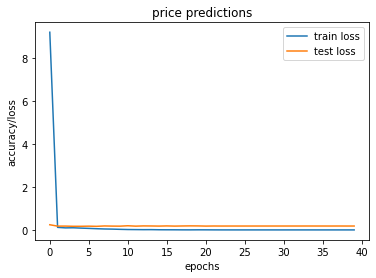

In [ ]:
plt.plot(H.history["loss"], label="train loss")
plt.plot(H.history["val_loss"], label="test loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy/loss")
plt.title("price predictions")
plt.show()